In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Heart_disease_cleveland_new.csv')

# Show the first few rows
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


In [2]:
print(df.info())
print(df.describe())
print(df['target'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    2.158416  131.68976

In [3]:
# Check how many missing values per column
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
df = df.dropna()


In [5]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


In [6]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['exang'] = df['exang'].astype('category')
df['ca'] = df['ca'].astype(int)  # if numeric but represents categories
df['thal'] = df['thal'].astype('category')


In [7]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
df = df[(z_scores < 3).all(axis=1)]


In [8]:
print(df.info())        # Check info again
print(df.isnull().sum())  # Confirm no missing values remain


<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       294 non-null    int64   
 1   sex       294 non-null    category
 2   cp        294 non-null    category
 3   trestbps  294 non-null    int64   
 4   chol      294 non-null    int64   
 5   fbs       294 non-null    category
 6   restecg   294 non-null    int64   
 7   thalach   294 non-null    int64   
 8   exang     294 non-null    category
 9   oldpeak   294 non-null    float64 
 10  slope     294 non-null    int64   
 11  ca        294 non-null    int64   
 12  thal      294 non-null    category
 13  target    294 non-null    int64   
dtypes: category(5), float64(1), int64(8)
memory usage: 25.1 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target   

Top 8 features selected by SelectKBest (chi2):
['chol', 'thalach', 'oldpeak', 'slope', 'ca', 'cp_3', 'exang_1', 'thal_3']

Feature ranking by Random Forest importance:
thalach: 0.1365
oldpeak: 0.1176
cp_3: 0.1125
thal_3: 0.0989
ca: 0.0979
chol: 0.0845
age: 0.0776
trestbps: 0.0681
slope: 0.0536
exang_1: 0.0454
sex_1: 0.0328
restecg: 0.0287
cp_2: 0.0172
thal_2: 0.0108
fbs_1: 0.0106
cp_1: 0.0072


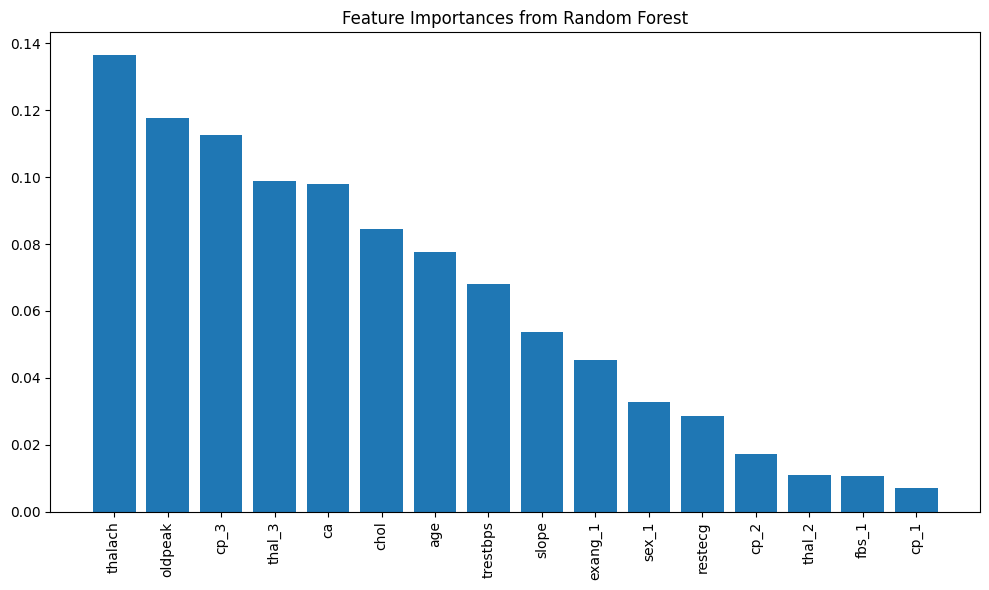

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# === Assuming your dataframe 'df' is clean and uses one-hot encoding for categorical vars ===

# Example: One-hot encode categorical columns (adjust columns list based on your dataset)
categorical_cols = ['sex', 'cp', 'fbs', 'exang', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Method 1: Univariate Selection using SelectKBest with Chi-Squared ---

# Select top 8 features
selector = SelectKBest(score_func=chi2, k=8)
selector.fit(X_train, y_train)

mask = selector.get_support()  # Boolean mask of selected features
selected_features = X_train.columns[mask]

print("Top 8 features selected by SelectKBest (chi2):")
print(selected_features.tolist())

# --- Method 2: Feature Importance via Random Forest ---

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = importances.argsort()[::-1]

print("\nFeature ranking by Random Forest importance:")
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]:.4f}")

# Optional: Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [10]:
# Assuming X_train, X_test split and categorical encoding done as before

from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(X_train.head())


          age  trestbps      chol  restecg   thalach   oldpeak  slope  ca  \
56  -0.447065  0.550215 -0.274765        0  0.607913 -0.378425      1   1   
84  -0.222337 -0.658766  1.711996        0  1.005235 -0.756850      0   0   
178 -1.233613 -0.054276  1.496044        0  0.563766  0.851456      0   1   
250  0.339483 -1.263256 -0.965812        0 -1.025524  0.473031      1   0   
243  0.788938  0.187521 -0.253170        0 -0.186732  1.513699      1   2   

     sex_1   cp_1   cp_2   cp_3  fbs_1  exang_1  thal_2  thal_3  
56    True  False   True  False  False    False   False    True  
84    True   True  False  False  False    False   False   False  
178   True  False   True  False  False    False   False   False  
250   True  False  False   True  False     True    True   False  
243   True  False  False  False  False    False   False   False  


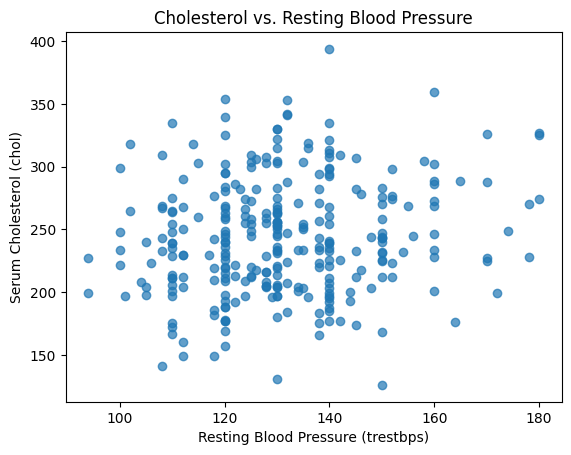

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['trestbps'], df['chol'], alpha=0.7)
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Serum Cholesterol (chol)')
plt.title('Cholesterol vs. Resting Blood Pressure')
plt.show()


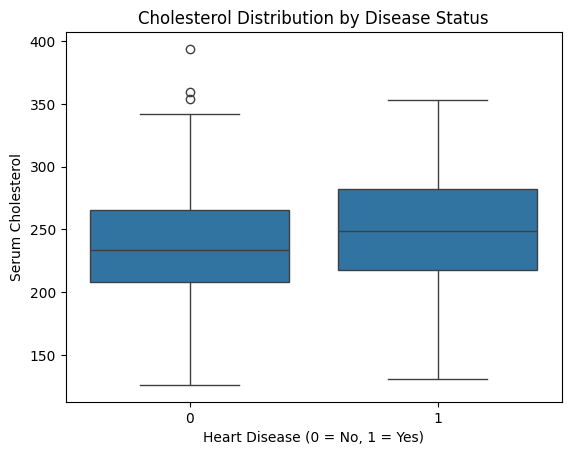

In [12]:
import seaborn as sns

sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Distribution by Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Serum Cholesterol')
plt.show()


In [13]:
corr = df.corr()
print(corr['target'].sort_values(ascending=False))


target      1.000000
thal        0.512112
ca          0.455709
exang       0.435990
oldpeak     0.419854
cp          0.409645
slope       0.325613
sex         0.293732
age         0.224158
restecg     0.169389
trestbps    0.121925
chol        0.109192
fbs         0.032780
thalach    -0.421440
Name: target, dtype: float64


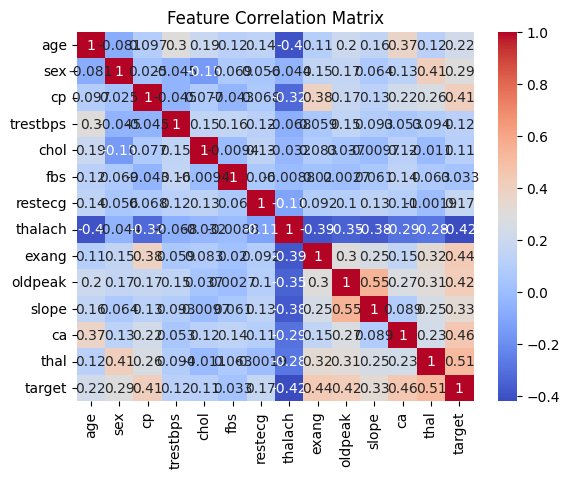

In [14]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


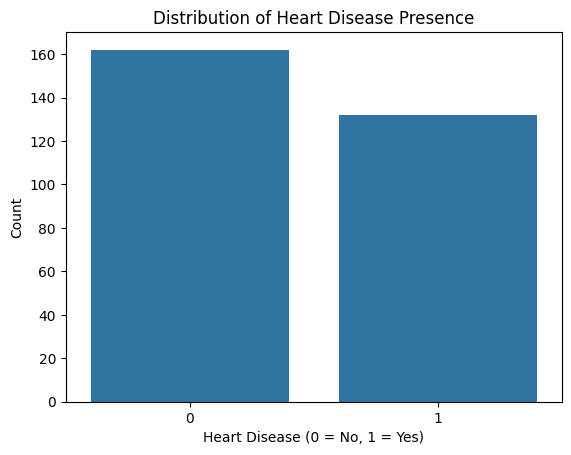

In [15]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already prepared, with features selected and normalized
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [17]:
from sklearn.metrics import classification_report


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.84      0.62      0.71        26

    accuracy                           0.78        59
   macro avg       0.80      0.76      0.77        59
weighted avg       0.79      0.78      0.77        59



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Your data: X_train, y_train

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid,
    cv=3, n_jobs=-1, verbose=0, scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [20]:
from sklearn.ensemble import RandomForestClassifier

tuned_rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=50,
    random_state=42
)
tuned_rf.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)

In [21]:
y_pred = tuned_rf.predict(X_test)
y_proba = tuned_rf.predict_proba(X_test)[:, 1]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.86      0.69      0.77        26

    accuracy                           0.81        59
   macro avg       0.82      0.80      0.81        59
weighted avg       0.82      0.81      0.81        59



In [23]:
from sklearn.metrics import roc_auc_score
print("ROC AUC:", roc_auc_score(y_test, y_proba))


ROC AUC: 0.8613053613053613


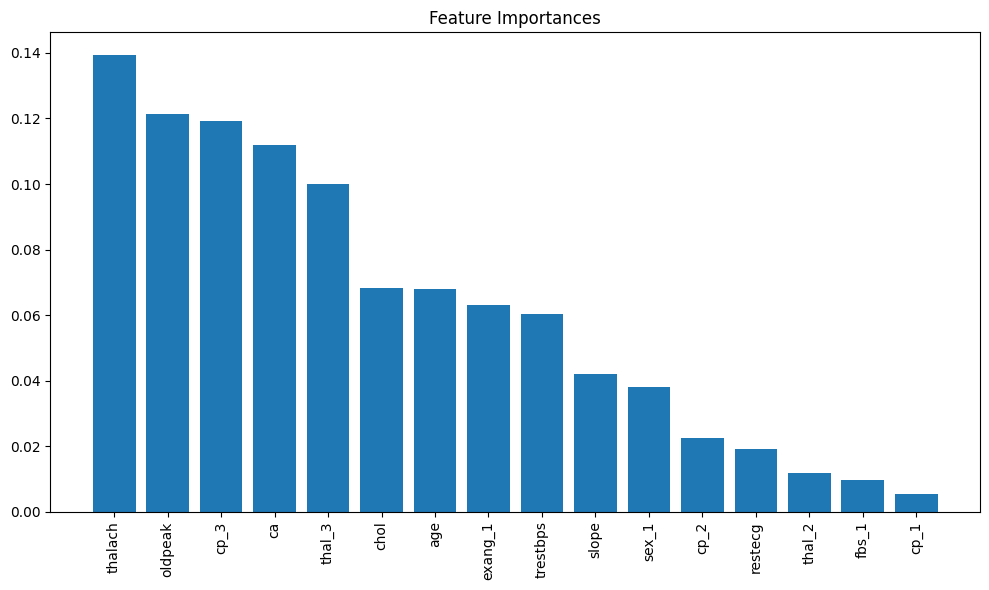

In [24]:
import numpy as np
import matplotlib.pyplot as plt

importances = tuned_rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X_train.columns[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), top_features, rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Untuned Random Forest: (default parameters)
untuned_rf = RandomForestClassifier(random_state=42)
untuned_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# For untuned model
untuned_y_pred = untuned_rf.predict(X_test)
untuned_y_proba = untuned_rf.predict_proba(X_test)[:,1]
print("Untuned Model Classification Report:")
print(classification_report(y_test, untuned_y_pred))
print("Untuned Model ROC AUC:", roc_auc_score(y_test, untuned_y_proba))

# For tuned model
tuned_y_pred = tuned_rf.predict(X_test)
tuned_y_proba = tuned_rf.predict_proba(X_test)[:,1]
print("Tuned Model Classification Report:")
print(classification_report(y_test, tuned_y_pred))
print("Tuned Model ROC AUC:", roc_auc_score(y_test, tuned_y_proba))


Untuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.84      0.62      0.71        26

    accuracy                           0.78        59
   macro avg       0.80      0.76      0.77        59
weighted avg       0.79      0.78      0.77        59

Untuned Model ROC AUC: 0.8758741258741258
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.86      0.69      0.77        26

    accuracy                           0.81        59
   macro avg       0.82      0.80      0.81        59
weighted avg       0.82      0.81      0.81        59

Tuned Model ROC AUC: 0.8613053613053613


In [28]:
import joblib
joblib.dump(tuned_rf, 'heart_disease_rf_model.pkl')



['heart_disease_rf_model.pkl']

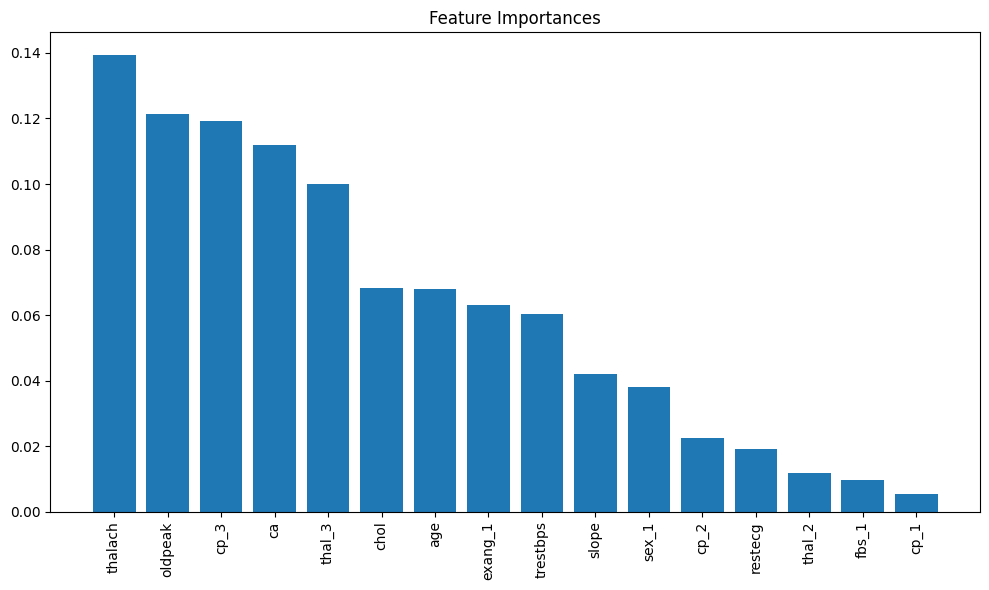

In [29]:
import matplotlib.pyplot as plt
import numpy as np

importances = tuned_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features, rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()
